<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a href=#eight>8. Recommendaction System Function</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [ ]:
!pip install scikit-surprise

In [3]:
# Libraries for importing and loading data
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import joblib
#from textwrap import wrap
import re
#from wordcloud import WordCloud

# Entity featurization and similarity computation
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from surprise import SVD
from surprise import SVDpp
from surprise import CoClustering
from surprise import Reader, Dataset
from surprise.model_selection import GridSearchCV, cross_validate


# Libraries used during sorting procedures.
#import operator # <-- Convienient item retrieval during iteration
#import heapq # <-- Efficient sorting of large lists
from time import time

# Setting global constants to ensure notebook results are reproducible

RANDOM_STATE = 25


import warnings
warnings.filterwarnings('ignore')


# Garbage Collector
#import gc

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

### 2.1 Brief description of the data



In [5]:
# load the data
train_df = pd.read_csv('train.csv')
movies_df = pd.read_csv('movies.csv')
imdb_df = pd.read_csv('imdb_data.csv')
test_df = pd.read_csv('test.csv')
links_df = pd.read_csv('links.csv')
tags = pd.read_csv('tags.csv')
genome_scores = pd.read_csv('genome_scores.csv')
genome_tags = pd.read_csv('genome_tags.csv')
sample_submissions = pd.read_csv('sample_submission.csv')

In [6]:
# Preview datasets
print(f'The Shape of the train data is: {train_df.shape}')
print(train_df.head(3))

print("********************************************************")
print('The Shape of the test data is: ', test_df.shape)
print(test_df.head(3))

print("********************************************************")
print('The Shape of the movies data is: ', movies_df.shape)
print(movies_df.head(3))

print("********************************************************")
print('The Shape of the  IMDB data is: ', imdb_df.shape)
print(imdb_df.head(3))

print("********************************************************")
print('The Shape of the links data is: ', links_df.shape)
print(links_df.head(3))

print("********************************************************")
print('The Shape of the tags data is: ', tags.shape)
print(tags.head(3))

print("********************************************************")
print('The Shape of the genome data is: ', genome_scores.shape)
print(genome_scores.head(3))

print("********************************************************")
print('The Shape of the genome_tags data is: ', genome_tags.shape)
print(genome_tags.head(3))

The Shape of the train data is: (10000038, 4)
   userId  movieId  rating   timestamp
0    5163    57669     4.0  1518349992
1  106343        5     4.5  1206238739
2  146790     5459     5.0  1076215539
********************************************************
The Shape of the test data is:  (5000019, 2)
   userId  movieId
0       1     2011
1       1     4144
2       1     5767
********************************************************
The Shape of the movies data is:  (62423, 3)
   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
********************************************************
The Shape of the  IMDB data is:  (27278, 6)
   movieId                                         title_cast  \

In [7]:
# Preview test dataset
print('The Shape of the data is: ', test_df.shape)
test_df.head()

The Shape of the data is:  (5000019, 2)


,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |

---


### Train and Test Data
We can start with the most important datasets which are the train and test datasets.
Let us check for outliers, null values and column types.

In [10]:
# checking for null values
print("Train: ")
print(str(train_df.isnull().sum()))
print("************")
print("Test: ")
print(str(test_df.isnull().sum()))
print("************")
print("Movies: ")
print(str(movies_df.isnull().sum()))
print("************")
print("Links: ")
print(str(links_df.isnull().sum()))
print("************")
print("IMDB: ")
print(str(imdb_df.isnull().sum()))
print("************")
print("Genome scores: ")
print(str(genome_scores.isnull().sum()))
print("************")
print("Genome tags: ")
print(str(genome_tags.isnull().sum()))

Train: 
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
************
Test: 
userId     0
movieId    0
dtype: int64
************
Movies: 
movieId    0
title      0
genres     0
dtype: int64
************
Links: 
movieId      0
imdbId       0
tmdbId     107
dtype: int64
************
IMDB: 
movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64
************
Genome scores: 
movieId      0
tagId        0
relevance    0
dtype: int64
************
Genome tags: 
tagId    0
tag      0
dtype: int64


In [11]:
# train column dtype check
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [12]:
# test column dtype check
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


In [13]:
# checking for null values
print(f'''
Train data
{train_df.nunique()}
''')
print(f'''
Test data
{test_df.nunique()}
''')


Train data
userId        162541
movieId        48213
rating            10
timestamp    8795101
dtype: int64


Test data
userId     162350
movieId     39643
dtype: int64



Let's visualize the rating distributions.

In [15]:
# group by ratings for visualization
ratings_df = train_df.groupby(['rating']).count()

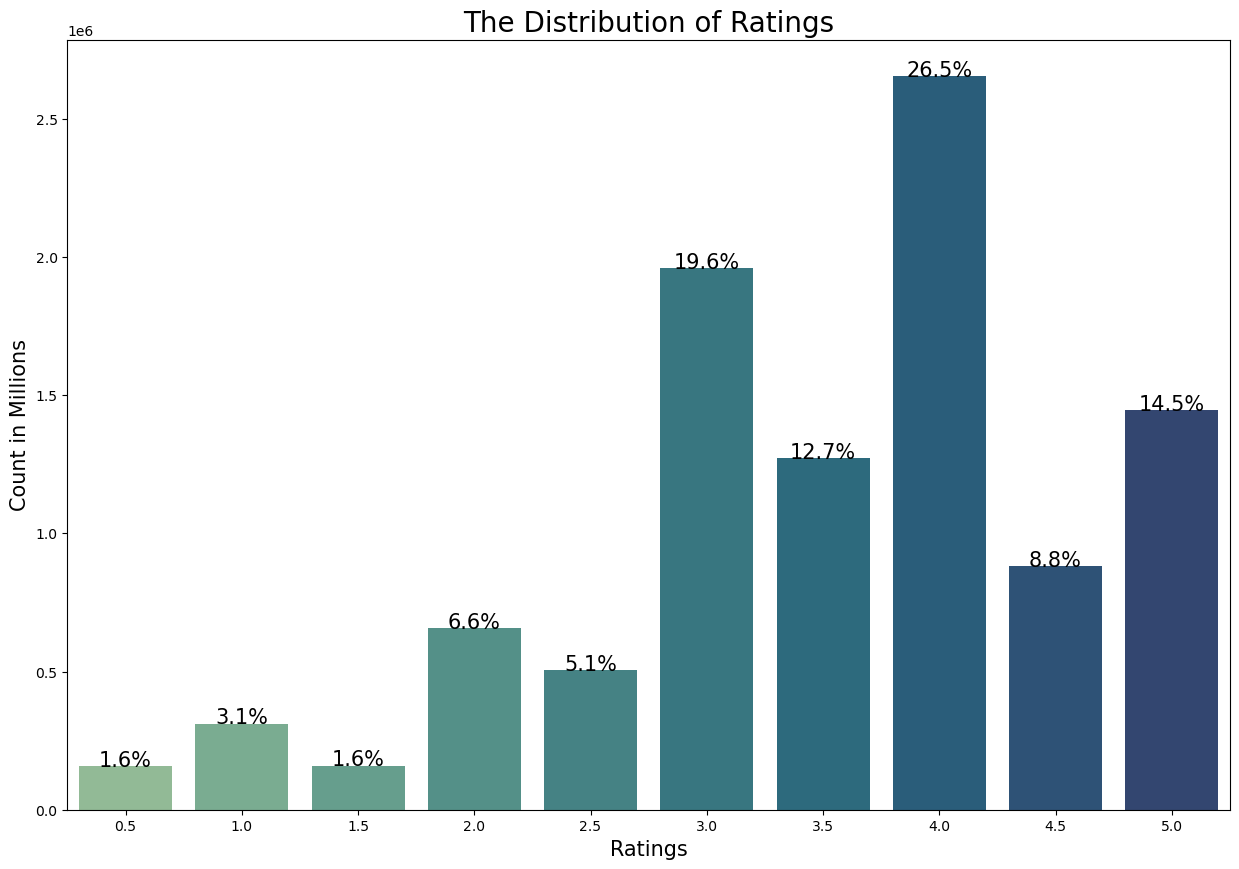

In [16]:
#Plot showing the distribution of counts
plot = plt.figure(figsize=(15, 10))
a = sns.barplot(x=ratings_df.index,y='userId',data=ratings_df,palette='crest')
a.set_title('The Distribution of Ratings',fontsize=20)
a.set_ylabel('Count in Millions',fontsize=15)
a.set_xlabel('Ratings',fontsize=15)

#Obtaining percentages on top of bars
n_obs = [i.get_height() for i in a.patches]
total = sum(n_obs)

for i in a.patches:
    # get_x pulls left or right; get_height pushes up or down
    a.text(i.get_x()+i.get_width() / 2, i.get_height()+0.5, \
            str(round((i.get_height()/total)*100, 1))+'%', fontsize=15,
                color='black',ha='center')

plt.show()


From the above cells we can conclude that:
- There are no outliers especially on the train rating column.
- There are no null values in the two data sets.
- All the columns are numerical type.
- There are `162541` unique user IDs in the train data.
- There are `162350` unique user IDs in the test data.
- Higher ratings were given on average with `4` given the most times with a percentage of `26.5%`.

In [18]:
del ratings_df

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |


---

In [20]:
test_df['userId'].nunique()

162350

Let's check if there are any userIds that are in the test data and not in the train data.

In [22]:
test_case = test_df['userId'].unique()
train_case = train_df['userId'].unique()
print([id for id in test_case if id not in train_case])

[]


The above list is empty meaning that all the userIds in the test data are in the train data

#### Sorting of Tables

We proceed to sort both tables( train and test ) by useId

In [25]:
# Sort train dataset by userId
train_df.sort_values(by=['userId'], inplace= True)
train_df.head()

,userId,movieId,rating,timestamp
6308822,1,296,5.0,1147880044
3137042,1,27721,3.0,1147869115
2533005,1,665,5.0,1147878820
2524478,1,4308,3.0,1147868534
1946297,1,1250,4.0,1147868414


In [26]:
train_df.shape

(10000038, 4)

In [27]:
# Sort test dataset by userId
test_df.sort_values(by=['userId'], inplace= True)
test_df.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [28]:
# sort the movie dataset buy movieId
movies_df.sort_values(by=['movieId'], inplace=True)
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [29]:
test_df.shape

(5000019, 2)

In [30]:
train_df.head()

,userId,movieId,rating,timestamp
6308822,1,296,5.0,1147880044
3137042,1,27721,3.0,1147869115
2533005,1,665,5.0,1147878820
2524478,1,4308,3.0,1147868534
1946297,1,1250,4.0,1147868414


Merge the dataset with ratings to their specific movie titles in movie dataset

In [32]:
# Merge based on the columns userId, and movieId
merged_df = pd.merge(train_df, movies_df, left_on=['movieId', 'movieId'], right_on=['movieId', 'movieId'], how='inner')
merged_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,4,296,4.0,1573938898,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,5,296,4.0,830786155,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,8,296,5.0,890489713,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,12,296,5.0,1119354604,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


In [39]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
 4   title      object 
 5   genres     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 457.8+ MB


In [45]:
# drop unwanted columns in modelling and producing recommendations
merged_df.drop(columns=['timestamp', 'genres'], axis=1, inplace=True)
merged_df.head()

,userId,movieId,rating,title
0,1,296,5.0,Pulp Fiction (1994)
1,4,296,4.0,Pulp Fiction (1994)
2,5,296,4.0,Pulp Fiction (1994)
3,8,296,5.0,Pulp Fiction (1994)
4,12,296,5.0,Pulp Fiction (1994)


In [46]:
# Sort the merged_df on the userId column
merged_df.sort_values(by='userId', inplace=True)
merged_df.head()

,userId,movieId,rating,title
0,1,296,5.0,Pulp Fiction (1994)
64990,1,899,3.5,Singin' in the Rain (1952)
78534,1,6370,4.5,"Spanish Apartment, The (L'auberge espagnole) (..."
97545,1,2632,5.0,"Saragossa Manuscript, The (Rekopis znaleziony ..."
59467,1,1237,5.0,"Seventh Seal, The (Sjunde inseglet, Det) (1957)"


In [47]:
merged_df.isnull().sum()

userId     0
movieId    0
rating     0
title      0
dtype: int64

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |


---

### 5.1 Collaborative filtering

These are recommender systems that are base solely on the past interations recorded between users and items, in our case userIds and movies. These interactions are stored in **user-item interaction matrix**.

The main Idea that rules collaborative method is that the past user-item interations are sufficient to detect similar users and/or similar items that make predictions possible.

Consdering the above, in our EDA above, we confirmed that all userIds in the test dataset are present in the train dataset, we also confirmed that all movieIds in the test dataset are also present in the train dataset. Hence we can proceed to make prediction(movie ratings) using the **Collaborative filtering method**

#### Confirm shape and format of train dataset again

In [52]:
# confirm train dataset
print('The shape of train data is: ', train_df.shape)
train_df.head()

The shape of train data is:  (10000038, 4)


,userId,movieId,rating,timestamp
6308822,1,296,5.0,1147880044
3137042,1,27721,3.0,1147869115
2533005,1,665,5.0,1147878820
2524478,1,4308,3.0,1147868534
1946297,1,1250,4.0,1147868414


#### Confirm shape and format of test dataset again

In [54]:
# Confirm test dataset
print('The shape of test data is: ', test_df.shape)
test_df.head()

The shape of test data is:  (5000019, 2)


,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


#### Drop unwanted columns

We proceeded to drop the key_words column in the train dataset because the approach to collaborative filtering we have
chosen **user-item**, will only require we work with the below listed columns from the train dataset:
- userId
- movieId
- rating

Also, for this approach, we have chosen to use a python package called **surprise**.
Surprise is an easy-to-use Python scikit for recommender systems.

In [57]:
# Drop key_words column for the train dataset
ratings = train_df.drop(columns='timestamp')

# Instanciate a Reader object from surprise package
reader = Reader()

# Instanciate the dataset object from surprice package with the ratings table and reader object
data = Dataset.load_from_df(ratings, reader)

#### Instanciate and train an SVD model from the surprise package

The surprise package has in it different models for solving a recommender system task, one of the is the SVD model, which we have chosen for this project.

#### Hyperparameter Tuning with GridSearchCV

Hyper-parameter tuning is a process of determining a set of optimal hyperparameters values for a learning algorithm.
A hyperparameter is a model argument whose value is set before the learning process begins.



In [54]:
# help(SVD)

In [55]:
# Define the parameter grid
#param_grid = {
    #'n_factors': [1000, 700],
    #'init_std_dev': [0.005],
    #'random_state': [25, 42],
    #'biased': [True, False],
    #'lr_all': [0.002, 0.005],
    #'reg_all': [0.02, 0.05]
#}

# Initialize GridSearchCV with fewer jobs
#grid_SVD = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=2, n_jobs=2, joblib_verbose=10)

# Fit the model
#grid_SVD.fit(data)

# Print the best score and parameters
#print('Best Score is: ', grid_SVD.best_score['rmse'])
#print('Best Parameters are: ', grid_SVD.best_params['rmse'])

In [73]:
# Instantiate an SVD model from the surprice package
svd = SVD(n_epochs=50,n_factors=1500,init_std_dev=0.005,random_state=42,verbose=True)

# Instanciate and build the dataset with data object from surprise package
trainset = data.build_full_trainset()

# Train the SVD model
svd.fit(trainset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49


Our model takes a long time to run, approximately 137 minutes, so we'll pickle it to save on time on future runs.

In [90]:
model_save_path = "svd_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(svd,file)

In [72]:
model_save_path_joblib = "svd_model2.joblib"
with open(model_save_path_joblib,'wb') as file:
    joblib.dump(svd,file)

Run the code below to load the pickled model

In [91]:
model_load_path = "svd_model.pkl"
with open(model_load_path,'rb') as file:
    unpickled_model = pickle.load(file)

In [66]:
model_load_path = "svd_model2.joblib"
with open(model_load_path,'rb') as file:
    unpickled_model = joblib.load(file)

#### Making Predicitons


In [95]:
# Extract the userIds and corresponding movieIds into a python list
userId = test_df['userId'].values.tolist()
movieId = test_df['movieId'].values.tolist()

# Create a range of numbers which is the size of list created above
count = len(userId)
rating = []
ids = []

# Make rating predictions with the corresponding userIds and movieIds, accessed through indexing
for i in range(count):
    result = svd.predict(userId[i], movieId[i])[3]

    # Store the predicted rating
    rating.append(result)

    # Prepare, save userId and movieId for submission
    ids.append(str(userId[i]) + '_' + str(movieId[i]))

In [97]:
# Convert ids and ratings to dataframe
test_sub_df =  pd.DataFrame({
        'Id': ids,
        'rating': rating
         })
test_sub_df.head()

,Id,rating
0,1_2011,3.251449
1,1_4144,4.155198
2,1_5767,3.744358
3,1_6711,4.064556
4,1_7318,2.816415


In [99]:
test_sub_df.shape

(5000019, 2)

In [101]:
# Convert dataframe to csv file for submission.
test_sub_df.to_csv('Kaggle_submission2.csv', index=False)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |


---

<a id="seven"></a>
## 7. Model Explanations & Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |


---

<a id="eight"></a>
## 8. Building a Recommandation System function
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Recommender system explanation ⚡ |
| :--------------------------- |


---

In [207]:
# Function to get collaborative recommendations for a user profile
def collaborative_recommendations(svd, merged_df, movie_title, n=10):
    # get movieId for the given movie title
    movie_id = merged_df[merged_df['title'] == movie_title]['movieId'].values[0]

    # Extract user profiles for the users who have rated the specified movie
    user_ids = merged_df[merged_df['movieId'] == movie_id]['userId'].unique()

    # get all unique movie IDs except the specified movie_id
    movie_ids = merged_df['movieId'].unique()
    movie_ids = movie_ids[movie_ids != movie_id]

    recommendations = []

    # Predict ratings for a random sample of users to speed up the process
    sampled_user_ids = pd.Series(user_ids).sample(n=min(len(user_ids), 100), random_state=42).values
    sampled_movie_ids = pd.Series(movie_ids).sample(n=min(len(movie_ids), 1000), random_state=42).values

    for user_id in sampled_user_ids:
        user_recommendations = []
        for movie_id in sampled_movie_ids:
            prediction = svd.predict(user_id, movie_id)
            user_recommendations.append((merged_df[merged_df['movieId'] == movie_id]['title'].values[0], prediction.est))
        user_recommendations = sorted(user_recommendations, key=lambda x: x[1], reverse=True)
        recommendations.extend(user_recommendations[:n])

    recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)

    # Remove duplicates while preserving order
    seen = set()
    unique_recommendations = []
    for movie, rating in recommendations:
        if movie not in seen:
            unique_recommendations.append(movie)
            seen.add(movie)
        if len(unique_recommendations) >= n:
            break

    return pd.Series(unique_recommendations, name="Recommended Movies")

In [ ]:
# call top_recommendations based on 'title'
top_recommendations = collaborative_recommendations(svd, merged_df, 'Jumanji (1995)', n=10)
top_recommendations